# SysML v2 MBSE Methodologies JupyterBook<a name="sysmlv2modmethodologies"></a>

*Last update: January 23rd, 2022*

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

* [SYSMOD with SysML v2](#sysmlv2sysmod)
  * [Problem Statement](#sysmlv2sysmodproblem)
  * [System Idea and System Objectives](#sysmlv2sysmodidea)
  * [System Context](#sysmlv2sysmodcontext)
* [FAS with SysML v2](#sysmlv2fas)
* [VAMOS (Variant Modeling with SysML v2](#sysmlv2vamos)

## SYSMOD with SysML v2<a name="sysmlv2sysmod"></a>

The example is taken from the book [SYSMOD - The Systems Modeling Toolbox](https://leanpub.com/sysmod). It is a Forest Fire Detection System (FFDS).

The following will be part of the next edition of the SYSMOD book which will cover SysML v2.


### Problem Statement<a name="sysmlv2sysmodproblem"></a>

In [25]:
package SYSMODForestFireDetectionSystem {
    doc /* Requirements and System Architecture Specification of the SYSMOD Forest Fire Detection System (FFDS) */
    
    /**
     * Import of the SYSMOD language Library
     */
    import SYSMOD::*;
    
    part def FFDS :> System {
        attribute redefines problemStatement = "How can we provide a forest fire detection system for forest authorities that can be scaled to any forest size, is affordable, highly reliable and accurate in de tecting forest fires.";
    }
}

Package SYSMODForestFireDetectionSystem (7cbd82d5-09e7-4362-ab19-94e090c7997d)


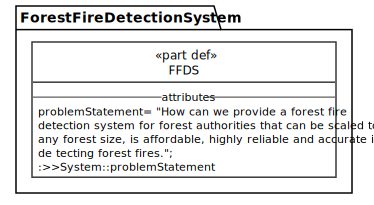

In [24]:
%viz ForestFireDetectionSystem 

### System Idea and System Objectives<a name="sysmlv2sysmodidea"></a>

The language extension of SysML v2 is still under development. Until it is available, I use a simplified approach to introduce SYSMOD concepts into the language. 

The following SysML v2 code defines the SYSMOD concepts of a *system* and an *objective*. They are applied to define the forest fire detection system element including the problem statement and the system idea, and the three system objectives. The complete definition of SYSMOD is described in chapter [SYSMOD Language Library](#sysmodlibrary).


In [4]:
package SYSMOD {

    doc /* SYSMOD - The Systems Modeling Toolbox, Version 5.0beta */
        
    requirement def Objective {
        doc /* A objective is an objective of the system. It is a special kind of a requirement that is typically not satisfied but amplified by the system. */
    }
    
    part def System {
        doc /* Marks the system under development. Typically there is only one block in the model with that stereotype. However in a System of Systems (SoS) model there could be more. */
        import ScalarValues::String;
        attribute problemStatement : String;
        attribute systemIdea : String;
    }
}

Package SYSMOD (0133e388-aa3b-4c3e-9395-497ce6ccb85e)


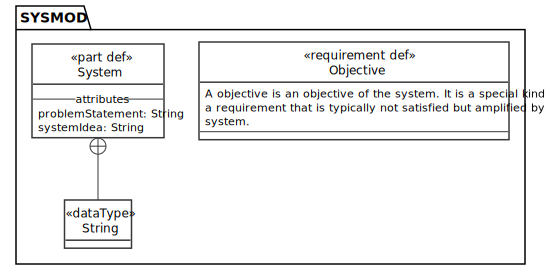

In [79]:
%viz SYSMOD

In [80]:
package ForestFireDetectionSystemModel {
    
    import SYSMOD::*;
    
    package FFDS_Core {
    
        part FFDS : System {
            value redefines problemStatement = "How can we provide a forest fire detection system for forest authorities that can be scaled to any forest size, is affordable, highly reliable and accurate in detecting forest fires.";
            value redefines systemIdea = "The FFDS is a satellite-based system to detect forest fires in very large areas. The system is also equipped with stationary sensors and animal sensors. Using different sources for the fire detection increases the reliability of the system and enables different system configurations for different environmental contexts and price segments. Main features of the FFDS are Detecting and reporting forest fires on time Monitoring forest and fires Uses the behavior of forest animals to detect fires";
        }
        
        package FFDS_Requirements {
            package FFDS_Objectives {
                requirement id 'OBJ-B1' 'Market Leader' : Objective {
                    doc /* The system will make the vendor the market leader for forest fire detection systems. */
                }
                requirement id 'OBJ-S1' 'Reliable Detection' : Objective {
                    doc /* Any forest fire is detected by the system on time to start effective counteractions. */
                }
                requirement id 'OBJ-S2' 'Affordability' : Objective {
                    doc /* The system is affordable for any forest authority. */
                }                               
            }
        }
    }
}

Package ForestFireDetectionSystemModel (009a17b7-084e-4c1b-8da7-125d37df44fe)


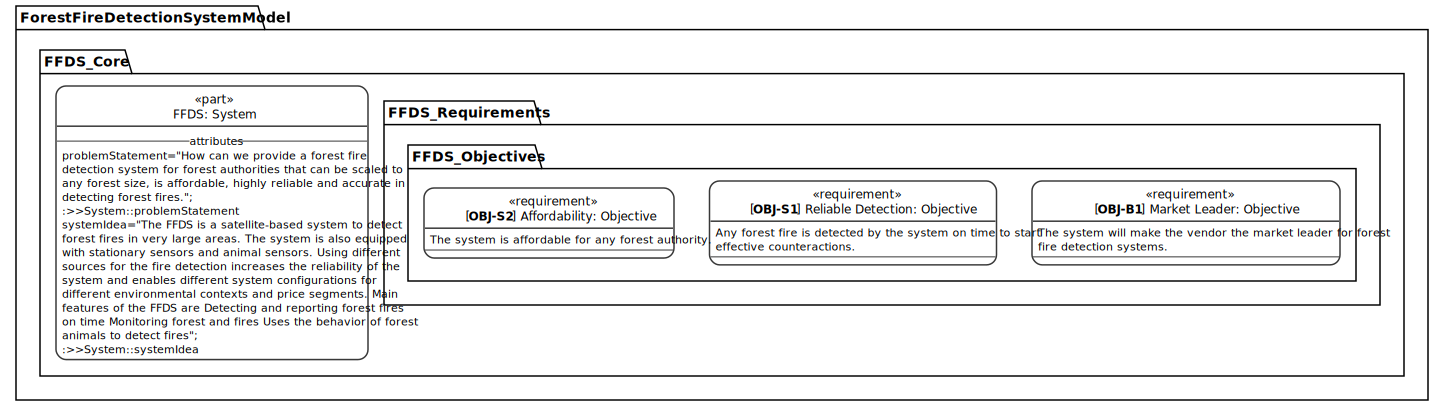

In [81]:
%viz ForestFireDetectionSystemModel

### System Context<a name="sysmlv2sysmodcontext"></a>

The concepts of use cases and actors are not yet defined in SysML v2. Therefore, the external entities of the system are defined as parts of the context. You must execute the SYSMOD library in chapter [SYSMOD Language Library](#sysmodlibrary) before executing the following cell.

In [15]:
package ForestFireDetectionSystemModel {
    
    import SYSMOD::*;
    
    package FFDS_Core {
    
       part 'FFDS System Context' : SystemContext {
          part FFDS : System :> systemOfInterest {            
            attribute redefines problemStatement = "How can we provide a forest fire detection system for forest authorities that can be scaled to any forest size, is affordable, highly reliable and accurate in detecting forest fires.";
            attribute redefines systemIdea = "The FFDS is a satellite-based system to detect forest fires in very large areas. The system is also equipped with stationary sensors and animal sensors. Using different sources for the fire detection increases the reliability of the system and enables different system configurations for different environmental contexts and price segments. Main features of the FFDS are Detecting and reporting forest fires on time Monitoring forest and fires Uses the behavior of forest animals to detect fires";
          }
          part Operator : User subsets actors;
          part Administrator : User subsets actors;
          part 'Forest Ranger' : User subsets actors;
          part Maintenance : User subsets actors;
          part 'Fire Department' : ExternalSystem subsets actors;
          part 'Meteorology data system' : ExternalSystem subsets actors;
          part 'Research analysis system' : ExternalSystem subsets actors;
          part 'Weather' : EnvironmentalEffect subsets actors;
          part 'Fire' : EnvironmentalEffect subsets actors;
          part 'Planet Environment' : EnvironmentalImpact subsets actors;          
       }                
    
       package FFDS_Requirements {
          package FFDS_Objectives {
             requirement id 'OBJ-B1' 'Market Leader' : Objective {
                  doc /* The system will make the vendor the market leader for forest fire detection systems. */
             }
             requirement id 'OBJ-S1' 'Reliable Detection' : Objective {
                  doc /* Any forest fire is detected by the system on time to start effective counteractions. */
             }
             requirement id 'OBJ-S2' 'Affordability' : Objective {
                  doc /* The system is affordable for any forest authority. */
             }                               
         }
      }
   }
}

ERROR:no viable alternative at input ''OBJ-B1'' (15.sysml line : 26 column : 29)
ERROR:no viable alternative at input ''Market Leader'' (15.sysml line : 26 column : 38)
ERROR:no viable alternative at input ''OBJ-S1'' (15.sysml line : 29 column : 29)
ERROR:no viable alternative at input ''Reliable Detection'' (15.sysml line : 29 column : 38)
ERROR:no viable alternative at input ''OBJ-S2'' (15.sysml line : 32 column : 29)
ERROR:no viable alternative at input ''Affordability'' (15.sysml line : 32 column : 38)


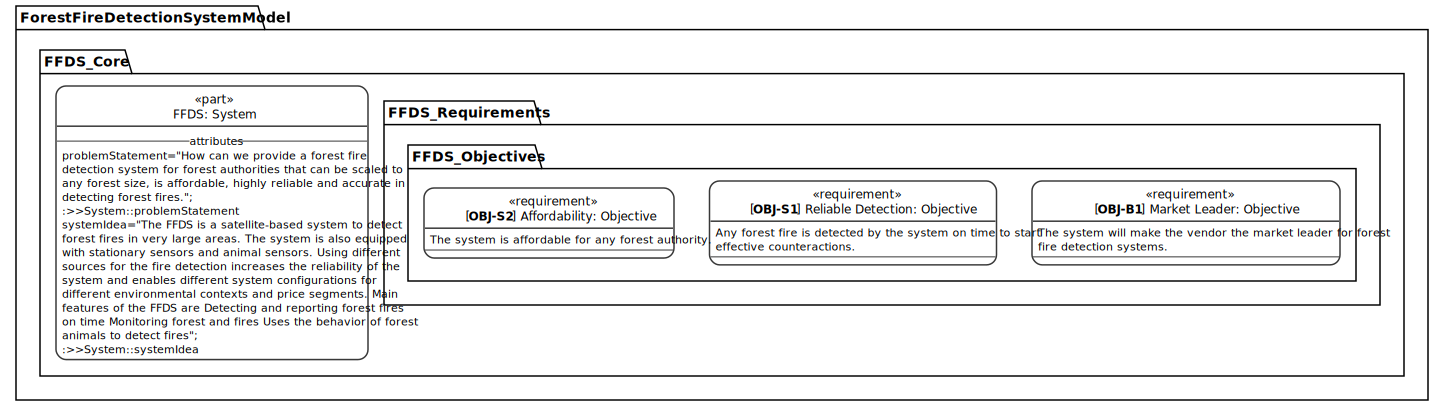

In [84]:
%viz ForestFireDetectionSystemModel

### System Use Cases

### Use Case Activities

### Domain Model

### Quality Requirements

### Logical Architecture 

### Product Architecture

### System States

### Verify Architecture with Scenarios

### Test Cases

### SYSMOD Language Library<a name="sysmodlibrary"></a>

In [3]:
package SYSMOD {
      
    doc /* SYSMOD - The Systems Modeling Toolbox, Version 5.0beta 
         *  
         *
         */

        
    import ScalarValues::*;
        
    requirement def Objective {
        doc /* A objective is an objective of the system. It is a special kind of a requirement that is typically not satisfied but amplified by the system. */
    }
    
    part def System {
        doc /* Represents an engineered system */
        
        attribute problemStatement : String;
        attribute systemIdea : String;
    }
    
    part def SystemContext {
        doc /* A system context is a wrapper around the system and it's actors to allow a detailed system context modeling. The system context references the appropriate system. This is important in a SoS model. */
            
        part systemOfInterest : System;
        part actors[0..*];        
    }
    
    part def User;
    part def ExternalSystem;
    part def EnvironmentalEffect;
    part def EnvironmentalImpact;
}

Package SYSMOD (a0f11bec-9a1b-4814-a71e-62147607396f)


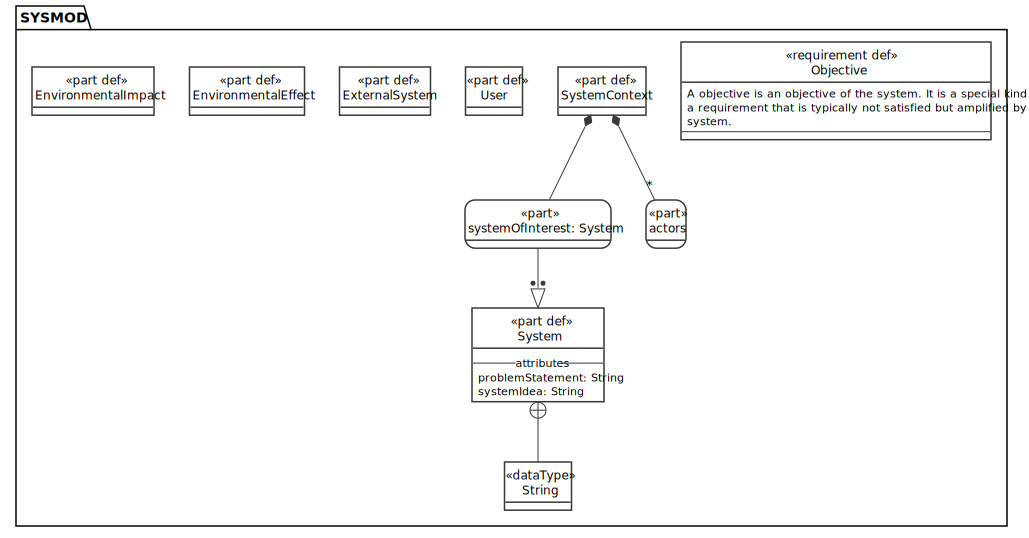

In [47]:
%viz SYSMOD

## Forest Fire Detection System<a name="sysmlv2ffds"></a>

In [13]:
package SYSMODForestFireDetectionSystem {

    doc /* Requirements and System Architecture Specification of the SYSMOD Forest Fire Detection System (FFDS) example system */        

    /**
     * Import of the SYSMOD language Library
     */
    import SYSMOD::*;
    
    part def ForestFireDetectionSystem :> System {
        attribute redefines problemStatement = "How can we provide a forest fire detection system for forest authorities that can be scaled to any forest size, is affordable, highly reliable and accurate in de tecting forest fires.";
    }
    
    package FFDS_PhysicalArchitecture {
        part ffds : ForestFireDetectionSystem {
            part ForrestObservationDrone [*] {
                part engine1 : DroneEngine;
                part engine2 : DroneEngine;
                part engine3 : DroneEngine;
                part engine4 : DroneEngine;
            }
        }
        
        part def DroneEngine;
    }    
}



Package SYSMODForestFireDetectionSystem (0019f5a3-2e98-4254-b99e-5e864d901a77)


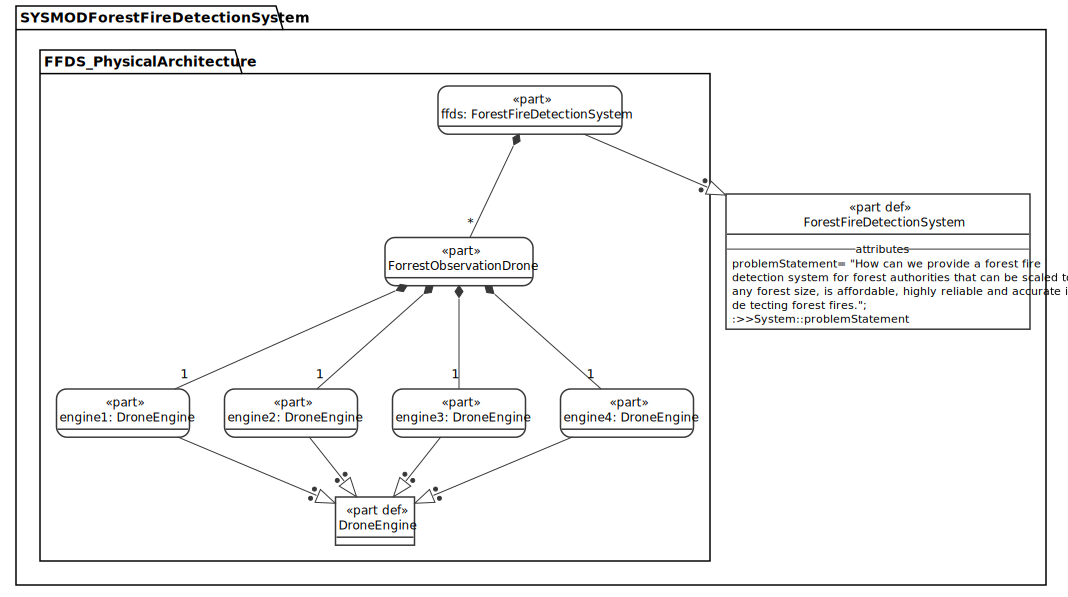

In [14]:
%viz SYSMODForestFireDetectionSystem

## FAS with SysML v2<a name="sysmlv2fas"></a>

The example is taken from the tutorial of the FAS plugin for MagicDraw: http://sourceforge.net/projects/fas4md/files/FAS_plugin_tutorial.pdf/download.

In [86]:
package TheFASJukeBox {
    
    package FASLanguage {
        part def FunctionalBlock;
    }
    
    package UseCases {
        activity '(Un)install and Move Jukebox';
        activity 'Ask for Track to Play';
        activity 'Assemble Music Collection';
        activity 'Connect Jukebox with Electrical Supply';
        activity 'Disconnect from Electrical Supply';
        activity 'Distribute Energy';
        activity 'Get Energy';
        activity 'Get Mechanical Energy';
        activity 'Get Money';
        activity 'Insert Cash';
        activity 'Install Jukebox';
        activity 'Listen to Music';
        activity 'Make Music Available';
        activity 'Monitor Payment';
        activity 'Play Music Track';
        activity 'Produce Sound';
        activity 'Provide Music Track';
        activity 'Retrieve Identification of Music Track';
        activity 'Retrieve Money';
        activity 'Supply Jukebox with Energy';
        activity 'Transform Mechanical Engery into Something Harmless';
        activity 'Uninstall Jukebox';
        activity 'Use Means of Music Transfer to Retrieve Music';
    }
    
    package DomainKnowledge {
        item def AudioSignal;
        item def ClearanceToPlayMusic;
        item def ElectricalEnergy;
        item def IdentificationOfMusicTrack;
        item def MechanicalEnergy;
        item def Money;
        item def MusicTrack;
    }

    package FunctionalArchitecture {
        
        import UseCases::*;
        import DomainKnowledge::*;
        import FASLanguage::*;
        import SYSMOD::*;
        
        package FunctionalInterfaces {

            port def AudioSignalPort {
                out item a : AudioSignal;
            }
            port def ClearanceToPlayMusicPort {
                out item m : ClearanceToPlayMusic;
            }
            port def ElectricalEnergyPort {
                out item e : ElectricalEnergy;
            }
            port def IdentificationOfMusicTrackPort {
                out item m : IdentificationOfMusicTrack;
            }
            port def MechanicalEnergyPort {
                out item m : MechanicalEnergy;
            }
            port def MoneyPort {
                out item m : Money;
            }
            port def MusicTrackPort {
                out item m : MusicTrack;
            }
        }

        part TheFASJukeBoxFunctionalContext {
            
            import FunctionalInterfaces::*;
            
            part TheFASJukeBoxFunctionalArchitecture {

                dependency from TheFASJukeBoxFunctionalArchitecture to '(Un)install and Move Jukebox';
                dependency from TheFASJukeBoxFunctionalArchitecture to 'Assemble Music Collection';
                dependency from TheFASJukeBoxFunctionalArchitecture to 'Listen to Music';
                dependency from TheFASJukeBoxFunctionalArchitecture to 'Supply Jukebox with Energy';

                part 'I/O Customer' : FunctionalBlock {
                    dependency from 'I/O Customer' to 'Ask for Track to Play';
                    dependency from 'I/O Customer' to 'Get Money';
                    dependency from 'I/O Customer' to 'Produce Sound';
                    
                    port p1 : MoneyPort;
                    port p2 : ~AudioSignalPort;
                    port p3 : IdentificationOfMusicTrackPort;
                }
                part 'I/O Electrical Supply' : FunctionalBlock {
                    dependency from 'I/O Electrical Supply' to 'Get Energy';
                    
                    port p1 : ElectricalEnergyPort;
                }
                part 'I/O Music Supplier' : FunctionalBlock {
                    dependency from 'I/O Music Supplier' to 'Use Means of Music Transfer to Retrieve Music';
                    
                    port p1 : MusicTrackPort;
                }
                part 'I/O Pub Interior' : FunctionalBlock {
                    dependency from 'I/O Pub Interior' to 'Get Mechanical Energy';
                    
                    port p1 : MechanicalEnergyPort;
                }
                part 'I/O Pub Manager' : FunctionalBlock {
                    dependency from 'I/O Pub Manager' to 'Connect Jukebox with Electrical Supply';
                    dependency from 'I/O Pub Manager' to 'Disconnect from Electrical Supply';
                    dependency from 'I/O Pub Manager' to 'Insert Cash';
                    dependency from 'I/O Pub Manager' to 'Retrieve Identification of Music Track';

                    port p1 : IdentificationOfMusicTrackPort;
                }
                part Accounting : FunctionalBlock {
                    dependency from Accounting to 'Monitor Payment';
                    
                    port p1 : ClearanceToPlayMusicPort;
                    port p2 : ~MoneyPort;
                }
                part 'Energy Distribution' : FunctionalBlock {
                    dependency from 'Energy Distribution' to 'Distribute Energy';
                    
                    port p1 : ~ElectricalEnergyPort;
                }
                part 'Music Player' : FunctionalBlock {
                    dependency from 'Music Player' to 'Play Music Track';
                    
                    port p1 : AudioSignalPort;
                }
                part 'Music Storage' : FunctionalBlock {
                    dependency from 'Music Storage' to 'Make Music Available';
                    dependency from 'Music Storage' to 'Provide Music Track';

                    port p1 : ~IdentificationOfMusicTrackPort;
                    port p2 : ~MusicTrackPort;
                    port p3 : ClearanceToPlayMusicPort;
                }
                part Suspension : FunctionalBlock {
                    dependency from Suspension to 'Uninstall Jukebox';
                    
                    port p1 : ~MechanicalEnergyPort;
                }

                connect 'I/O Pub Manager'::p1 to 'Music Storage'::p1;
                connect 'I/O Pub Manager' to 'Accounting';
                connect 'I/O Music Supplier'::p1 to 'Music Storage'::p2;
                connect 'Accounting'::p1 to 'Music Storage'::p3;
                connect 'I/O Customer'::p1 to Accounting::p2;
                connect 'Music Player'::p1 to 'I/O Customer'::p2;
                connect 'I/O Customer'::p3 to 'Music Storage'::p1;
                connect 'I/O Electrical Supply'::p1 to 'Energy Distribution'::p1;
                connect 'I/O Pub Interior'::p1 to Suspension::p1;
            }

            part Customer : User;
            part 'Pub Manager' : User;
            part 'Music Supplier' : ExternalSystem;
            part 'Electrical Supply' : ExternalSystem;
            part 'Pub Interior' : ExternalSystem;
            
            connect 'Pub Manager' to TheFASJukeBoxFunctionalArchitecture::'I/O Pub Manager';
            connect 'Music Supplier' to TheFASJukeBoxFunctionalArchitecture::'I/O Music Supplier';
            connect Customer to TheFASJukeBoxFunctionalArchitecture::'I/O Customer';
            connect 'Electrical Supply' to TheFASJukeBoxFunctionalArchitecture::'I/O Electrical Supply';
            connect 'Pub Interior' to TheFASJukeBoxFunctionalArchitecture::'I/O Pub Interior';
        }
    }   
}

Package TheFASJukeBox (e9345dee-26b9-4578-afee-5b74ec42eb9d)


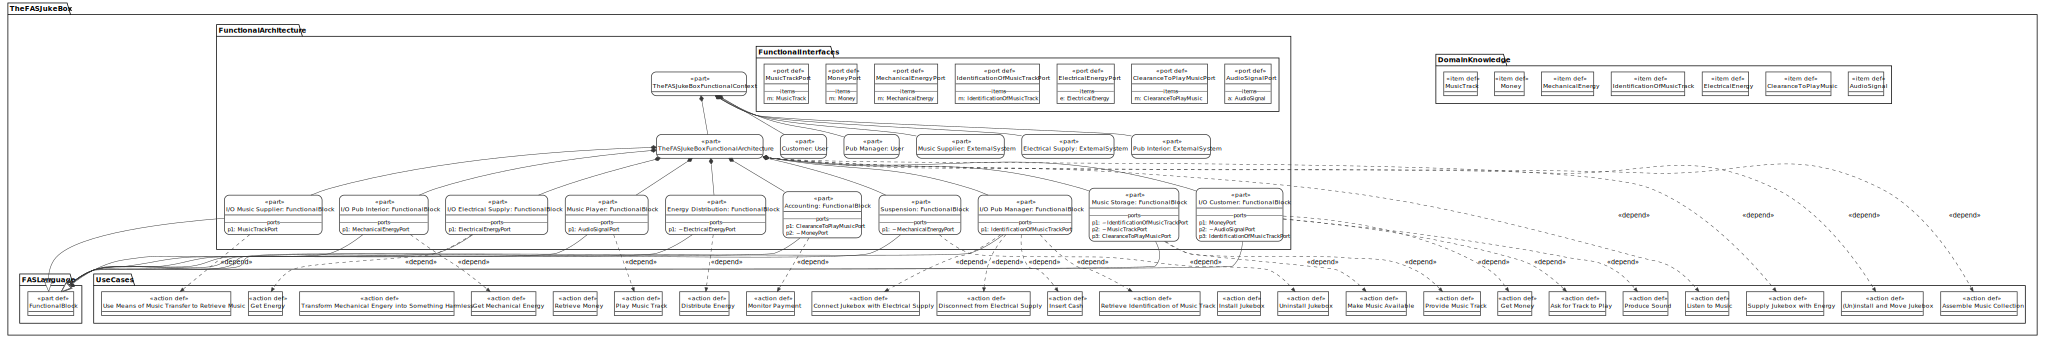

In [87]:
%viz --view=tree TheFASJukeBox

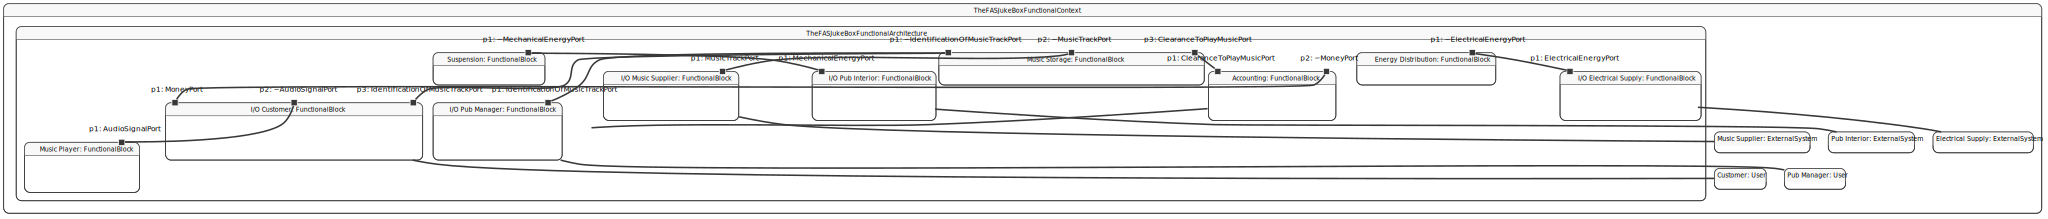

In [50]:
%viz --view=interconnection TheFASJukeBox::FunctionalArchitecture::TheFASJukeBoxFunctionalContext

# VAMOS (Variant Modeling with SysML)<a name="sysmlv2vamos"></a>